(Gravity corrections)=
# Gravity corrections
In this notebook, terrain and Bouguer corrections will be applied to a gravitational model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

According to Newton's law, gravtitational acceleration is equal to $g = \frac{GM}{R^2}$ in $m s^{-2}$, where G is the universal gravitational constant at 6.67508e-11 $m^3 kg^{-1}  s^{-2} $, M is the mass of the planetary body in kg and R is the radius of the planetary body in m.

A mountain with lower density than the crust for example produces a gravity low.

In the example below, the crust and two mountains have densities of 3500 $\frac{g}{cm^3}$, 2700  $\frac{g}{cm^3}$ and 3000  $\frac{g}{cm^3}$ respectively.

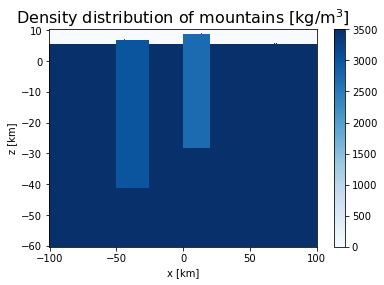

In [10]:
# define coordinate axes
x=np.linspace(-100000,100000,400)
z=np.linspace(-60000,10000, 110)

xv,zv=np.meshgrid(x,z,indexing='ij')

# create density distribution grid
rho = np.zeros(np.shape(xv)) 
rho[:,0:103]=3500.0 # set normal density of crust, reaching until 3km altitude
rho[200:240,50:108]=2700.0 # mountain 1
rho[100:150,30:105]=3000.0 # mountain 2

plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title('Density distribution of mountains [kg$/$m$^3$]', fontsize = 16)
plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='Blues')
plt.colorbar()
plt.show()

Gravity anomalies due to changes in density can be observed. Many types of corrections need to be done due to the structure and variations of the terrain. For example, one can correct for:
- drift
- latitude
- free-air
- Bouguer
- terrain
- Eotvos

### Bouguer correction
This correction reflects changes in near-surface density relative to a base station level.
To do the Bouguer correction, the vertical component of the gravitational acceleration is needed, which can be approximated as $$g_z = -G \sum_i \frac{m_i}{r_i^2} \hat{r_z}$$
where $m_i$ is the mass contained in a small volume and $r_z$ is the vertical unit vector between (x,y,z) and point P is the observation point.

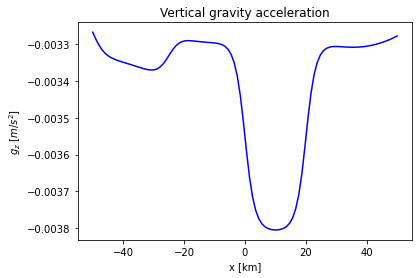

In [11]:
G=6.67508e-11 # universal gravitational constant

# Define observation points, P, for calculation of the vertical unit vector
x_obs=np.linspace(-50000,50000,100)
z_obs=12.0e3*np.ones(400)

gz=np.zeros(len(x_obs))
V = 1000**3 # volume related to grid spacing

# a forloop through all observation points to replicate the sum of the formula above.
for i in range(len(x_obs)):
    # distance to observation point
    r = np.sqrt((x_obs[i]-xv)**2 + (z_obs[i]-zv)**2) 
     # vertical unit vector distance to observation point
    r_vertical = (z_obs[i]-zv)/r
    # sum masses up
    gz[i]=-G*V*np.sum(r_vertical*rho/r**2) 
            
# Plot gravitational potential.
plt.plot(x_obs/1000.0,gz,'b')
plt.xlabel('x [km]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.title('Vertical gravity acceleration')
plt.show()

## Terrain correction
A terrain correction corrects for the local topography. This, since the crust is 3km above sea level, we must extract all excess topography above 3km. Below, the parts of the mountain that are above 3km altitude are plotted.

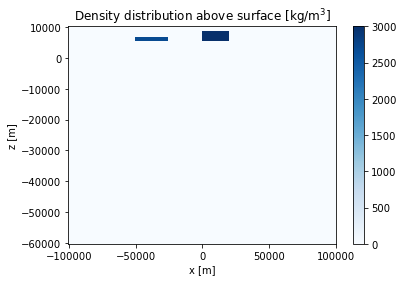

In [18]:
# create density distribution grid above 3km altitude
mountain =np.zeros(np.shape(xv))
mountain[200:240,103:108]=3000.0 # mountain 1
mountain[100:150,103:105]=2700.0 # mountain 2

# Plot density distribution.
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.title(r'Density distribution above surface [kg$/$m$^3$]')
plt.pcolor(xv,zv, mountain, cmap = 'Blues')
plt.colorbar()
plt.show()

Firstly, the vertical acceleration due to the excess topography above the 3km high crust is computed. The vertical component of the gravitational acceleration can (again) be approximated as $$g_z = -G \sum_i \frac{m_i}{r_i^2} \hat{r_z}$$

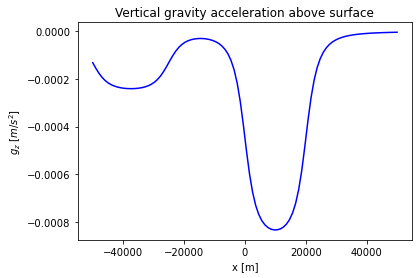

In [17]:
gz_mountain=np.zeros(len(x_obs))

# a forloop through all observation points to replicate the sum of the formula above.
for j in range(len(x_obs)):
    # distance to observation point
    r = np.sqrt((x_obs[j]-xv)**2 + (z_obs[j]-zv)**2) # distance to observation point
    # vertical unit vector distance to observation point
    r_vertical =(z_obs[j]-zv)/r # z-component of unit vector to observation point
    # sum masses up
    gz_mountain[j]=-G*V*np.sum(r_vertical * mountain/r**2) # sum over all masses

# Plot vertical gravitational acceleration of the mountains.plt.plot(x_obs,gz_mountain,'k')
plt.plot(x_obs, gz_mountain,'b')
plt.xlabel('x [m]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.title('Vertical gravity acceleration above surface')
plt.show()

Now, we can subtract the terrain correction from the total vertical gravitational acceleration from the Bouguer correction.

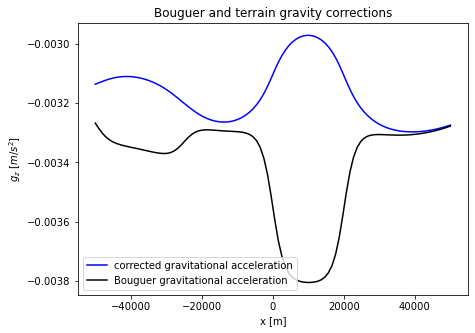

In [32]:
fig = plt.figure(figsize=(7,5))
plt.xlabel('x [m]')
plt.ylabel(r'$g_z$ [$m$/$s^2$]')
plt.plot(x_obs, gz-gz_mountain,'b', label = 'corrected gravitational acceleration')
plt.plot(x_obs, gz,'k', label = 'Bouguer gravitational acceleration')
plt.title(r'Bouguer and terrain gravity corrections')
plt.legend(loc = 'lower left')
plt.show()